In [18]:
import numpy as np
from scipy.io import loadmat
import csv
from PIL import Image
from mitcv import utils
import matplotlib.pyplot as plt
import cv2

In [11]:
colors = loadmat('mitcv/data/color150.mat')['colors']

In [12]:
names = {}
with open('mitcv/data/object150_info.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        names[int(row[0])] = row[5].split(";")[0]

In [8]:
true_class = Image.open('data/class.png')

In [9]:
true_class = np.asarray(true_class, dtype=int).copy()

In [10]:
for i, val in enumerate(np.unique(true_class)):
    true_class[true_class == val] = i - 1

In [8]:
pred_class = np.asarray(Image.open('result/class_Training_Color.png')).copy()

In [9]:
true_class

array([[ 5,  5,  5, ...,  1,  1,  1],
       [-1, -1,  5, ...,  1,  1,  1],
       [ 5,  5,  5, ...,  1,  1,  1],
       ...,
       [-1, -1,  5, ...,  3, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ...,  3, -1, -1]])

In [10]:
np.mean(pred_class == true_class)

0.627872

In [12]:
true_color_map = utils.colorEncode(true_class, colors).astype(np.uint8)

In [40]:
Image.fromarray(true_color_map).save('true.png')

In [15]:
pred_color_map = utils.colorEncode(pred_class, colors).astype(np.uint8)

In [42]:
Image.fromarray(pred_color_map).save('pred.png')

In [22]:
iou = np.zeros(6)
for i in range(6):
    pred_i = (pred_class == i)
    true_i = (true_class == i)
    iou[i] = np.sum(pred_i & true_i) / np.sum(pred_i | true_i)

In [23]:
np.mean(iou)

0.5675056611161989

In [36]:
big_im = np.asarray(Image.open('data/ChbarMon_Clipped.tif'))

In [37]:
Image.fromarray(big_im).save('data/ChbarMon_Clipped.jpg')

In [38]:
iou

array([0.76690452, 0.8634436 , 0.20663265, 0.55717464, 0.46056522,
       0.55031334])

In [43]:
colors[:6]

array([[120, 120, 120],
       [180, 120, 120],
       [  6, 230, 230],
       [ 80,  50,  50],
       [  4, 200,   3],
       [120, 120,  80]], dtype=uint8)

In [49]:
color_p = np.ones((120,60,3))
for i in range(6):
    color_p[i*20:(i+1)*20] *= colors[i][None, None, :]

In [53]:
Image.fromarray(color_p.astype(np.uint8)).save('pallete.jpg')

In [55]:
acc = np.zeros(6)
for i in range(6):
    true_i = (true_class == i)
    pred_i = (pred_class == i)
    acc[i] = np.sum(true_i & pred_i) / np.sum(true_i)

In [56]:
acc

array([0.90606182, 0.90515708, 0.26791621, 0.84783345, 0.6747255 ,
       0.94399795])

In [57]:
np.mean(acc)

0.7576153346846307

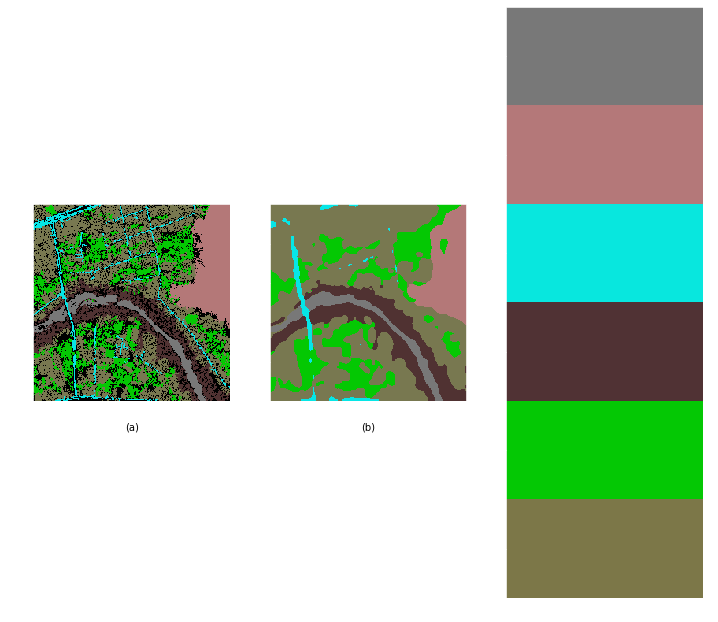

In [46]:
fig, ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(plt.imread('result/true.png'))
ax[0].set_xlabel('(a)')
ax[1].imshow(plt.imread('result/pred.png'))
ax[1].set_xlabel('(b)')
for a in ax:
    a.spines['top'].set_color('white')
    a.spines['bottom'].set_color('white')
    a.spines['left'].set_color('white')
    a.spines['right'].set_color('white')
    
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')

# plt.savefig('prediction')

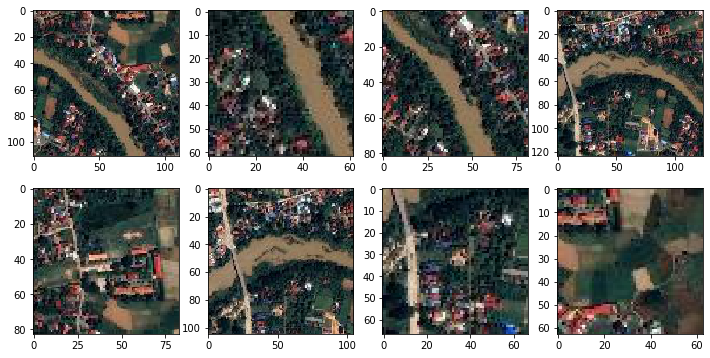

In [24]:
fig, ax = plt.subplots(2,4, figsize=(12,6))
for l in ax:
    for a in l:
        num = np.random.choice(range(8010))
        a.imshow(plt.imread('data/train/images/train_{:05}.jpg'.format(num)))
plt.savefig('data2')

In [7]:
np.linspace(150,250,11)

array([150., 160., 170., 180., 190., 200., 210., 220., 230., 240., 250.])

In [13]:
original = np.asarray(Image.open('data/Training_Color.jpg')).copy()

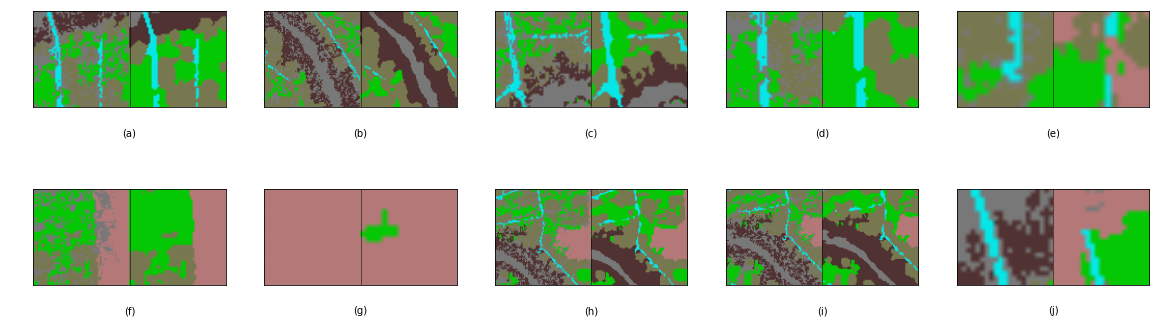

In [61]:
fix_size = (200,200)
fig, ax = plt.subplots(2,5, figsize=(20,6))
for i in range(10):
    color_map = np.zeros((200,400, 3), dtype=np.uint8)
    pred = np.asarray(Image.open('result/small/class_img_{}.png'.format(i)))
    true = np.asarray(Image.open('data/test/small/class_{}.png'.format(i)))
    pred_color_map = utils.colorEncode(pred, colors).astype(np.uint8)
    true_color_map = utils.colorEncode(true, colors).astype(np.uint8)
    
    color_map[:,:200] = cv2.resize(true_color_map, fix_size)
    color_map[:,200:] = cv2.resize(pred_color_map, fix_size)
    
    axis = ax[i//5, i%5]
    axis.imshow(color_map)
    axis.plot([200]*200, range(200), color='black', linewidth=0.5)
    axis.set_xlabel('({})'.format(chr(97+i)))
    axis.tick_params(axis='x', colors='white')
    axis.tick_params(axis='y', colors='white')

plt.savefig('small')

In [60]:
for i in range(10):
    color_map = np.zeros((200,400, 3), dtype=np.uint8)
    pred = np.asarray(Image.open('result/small/class_img_{}.png'.format(i)))
    true = np.asarray(Image.open('data/test/small/class_{}.png'.format(i)))    
    print('shape', pred.shape)
    print('  pixel acc', np.mean(pred == true))
    iou = np.zeros(6)
    for i in range(6):
        pred_i = (pred == i)
        true_i = (true == i)
        iou[i] = np.sum(pred_i & true_i) / np.sum(pred_i | true_i)
        print(f'  class {i} iou', iou[i])
    print('  mean iou', np.nanmean(iou))

shape (61, 61)
  pixel acc 0.6710561676968557
  class 0 iou 0.06500802568218299
  class 1 iou nan
  class 2 iou 0.6857142857142857
  class 3 iou 0.6864784546805349
  class 4 iou 0.6493416493416494
  class 5 iou 0.6317034700315457
  mean iou 0.5436491770900397
shape (96, 96)
  pixel acc 0.7043185763888888
  class 0 iou 0.2913550702961412
  class 1 iou 0.0
  class 2 iou 0.48148148148148145
  class 3 iou 0.650482597250658
  class 4 iou 0.6065292096219931
  class 5 iou 0.654454401686874
  mean iou 0.4473837933895246
shape (52, 52)
  pixel acc 0.6797337278106509
  class 0 iou 0.29938900203665986
  class 1 iou nan
  class 2 iou 0.6412698412698413
  class 3 iou 0.6134122287968442
  class 4 iou 0.5897058823529412
  class 5 iou 0.580110497237569
  mean iou 0.5447774903387712
shape (40, 40)
  pixel acc 0.65625
  class 0 iou 0.0
  class 1 iou nan
  class 2 iou 0.7225806451612903
  class 3 iou nan
  class 4 iou 0.6526946107784432
  class 5 iou 0.5990853658536586
  mean iou 0.493590155448348
shape 

C:\Users\liche\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
